In [1]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
spray = pd.read_csv('./spray.csv')
weather = pd.read_csv('./weather.csv')

In [4]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [5]:
spray = spray.dropna()

In [6]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [7]:
train.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [8]:
train = train.drop(['Address', 'Street', 'Species', 'Block', 'AddressNumberAndStreet', 'AddressAccuracy'], axis = 1)

In [9]:
train.head(3)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,T002,41.954690,-87.800991,1,0
1,2007-05-29,T002,41.954690,-87.800991,1,0
2,2007-05-29,T007,41.994991,-87.769279,1,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 6 columns):
Date            10506 non-null object
Trap            10506 non-null object
Latitude        10506 non-null float64
Longitude       10506 non-null float64
NumMosquitos    10506 non-null int64
WnvPresent      10506 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 492.5+ KB


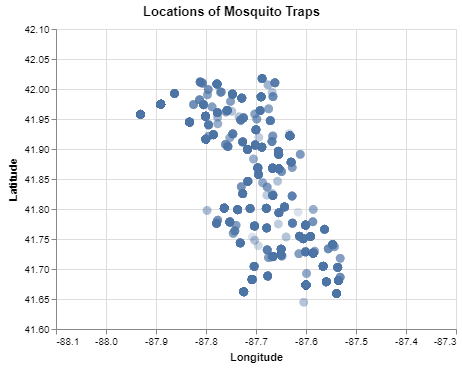

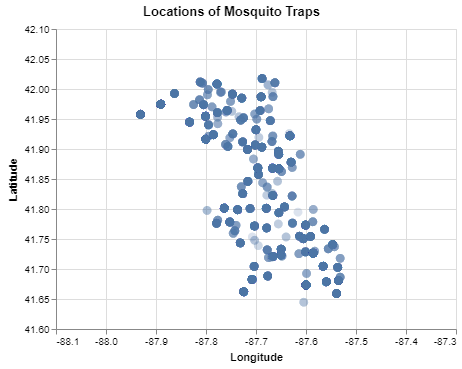

In [11]:
maps = alt.Chart(train.sample(4999)).mark_circle(size = 80, opacity = 0.1).encode(
    alt.X('Longitude', title = "Longitude", scale = alt.Scale(domain=[-88.1, -87.3])),
    alt.Y('Latitude', title = "Latitude", scale = alt.Scale(domain=[41.6, 42.1])),
).properties(title= "Locations of Mosquito Traps"
).interactive(
)
maps

In [12]:
train = train.groupby(['Date', 'Trap', 'Latitude', 'Longitude']).sum().reset_index()

In [13]:
train.sort_values(['WnvPresent'], ascending = False).head(20)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
4341,2013-08-29,T900,41.974689,-87.890615,608,12
743,2007-08-16,T115,41.673408,-87.599862,2636,11
4411,2013-09-06,T900,41.974689,-87.890615,550,9
4054,2013-08-01,T900,41.974689,-87.890615,984,9
854,2007-08-22,T138,41.726465,-87.585413,1124,7
851,2007-08-22,T115,41.673408,-87.599862,1615,7
344,2007-07-25,T115,41.673408,-87.599862,3002,5
3042,2011-08-12,T900,41.974689,-87.890615,246,5
651,2007-08-15,T016,42.011601,-87.811506,216,4
852,2007-08-22,T128,41.704572,-87.565666,338,4


In [14]:
train.sort_values(['NumMosquitos'], ascending = False).head(20)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
344,2007-07-25,T115,41.673408,-87.599862,3002,5
743,2007-08-16,T115,41.673408,-87.599862,2636,11
472,2007-08-01,T115,41.673408,-87.599862,2479,0
963,2007-08-28,T115,41.673408,-87.599862,2476,4
629,2007-08-08,T138,41.726465,-87.585413,1892,2
1052,2007-09-05,T115,41.673408,-87.599862,1648,3
627,2007-08-08,T115,41.673408,-87.599862,1625,3
851,2007-08-22,T115,41.673408,-87.599862,1615,7
1699,2009-06-22,T900,41.974689,-87.890615,1596,0
1241,2007-09-19,T115,41.673408,-87.599862,1361,1


In [15]:
train.head()

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,T002,41.954690,-87.800991,2,0
1,2007-05-29,T007,41.994991,-87.769279,1,0
2,2007-05-29,T015,41.974089,-87.824812,5,0
3,2007-05-29,T045,41.921600,-87.666455,2,0
4,2007-05-29,T046,41.891118,-87.654491,1,0


In [16]:
train['WnvPresent'] = train[['WnvPresent']].apply(lambda x: [y if y <= 0 else 1 for y in x])

In [17]:
train.head(5)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,T002,41.954690,-87.800991,2,0
1,2007-05-29,T007,41.994991,-87.769279,1,0
2,2007-05-29,T015,41.974089,-87.824812,5,0
3,2007-05-29,T045,41.921600,-87.666455,2,0
4,2007-05-29,T046,41.891118,-87.654491,1,0


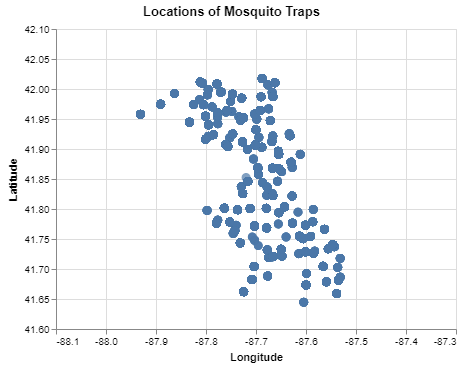

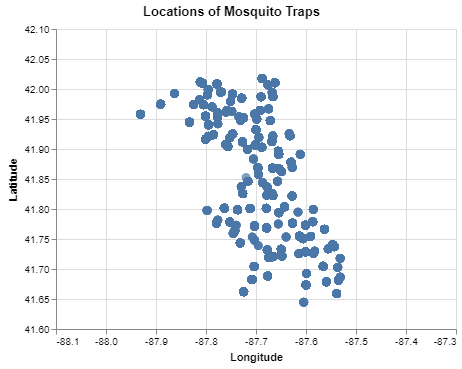

In [18]:
maps = alt.Chart(train).mark_circle(size = 80).encode(
    alt.X('Longitude', title = "Longitude", scale = alt.Scale(domain=[-88.1, -87.3])),
    alt.Y('Latitude', title = "Latitude", scale = alt.Scale(domain=[41.6, 42.1])),
).properties(title= "Locations of Mosquito Traps"
).interactive(
)
maps

In [19]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [20]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [21]:
weather = weather.drop(['Depart', 'Sunrise', 'Sunset', 'Heat', 'Cool', "CodeSum", 'Depth', 'Water1'], axis = 1)
weather = weather[weather.Station != 2]

In [22]:
weather.SnowFall.unique()

array(['0.0', '  T', '0.1'], dtype=object)

In [23]:
weather.PrecipTotal.unique()

array(['0.00', '  T', '0.13', '0.38', '0.14', '0.07', '0.02', '1.01',
       '0.04', '0.01', '0.19', '0.39', '0.42', '0.28', '0.58', '0.05',
       '0.16', '0.15', '0.40', '0.30', '0.43', '0.11', '1.55', '0.17',
       '0.03', '1.43', '0.26', '1.31', '0.06', '0.29', '0.41', '0.23',
       '0.09', '1.33', '0.91', '0.37', '2.35', '0.24', '0.34', '0.18',
       '0.36', '0.27', '0.33', '1.28', '0.76', '0.95', '0.08', '0.12',
       '0.48', '0.52', '0.64', '1.24', '0.20', '0.72', '0.73', '1.61',
       '0.74', '1.05', '2.43', '2.90', '1.23', '6.64', '1.44', '0.82',
       '0.80', '0.32', '0.67', '0.55', '1.73', '0.44', '0.45', '3.97',
       '0.25', '0.68', '0.63', '0.35', '0.93', '0.22', '0.75', '0.89',
       '0.21', '0.46', '1.03', '0.60', '0.81', '0.97', '1.49', '1.02',
       '0.59', '0.87', '0.85', '0.54', '0.79', '2.79', '3.64', '0.10',
       '0.31', '2.24', '1.06', '1.88', '6.86', '0.71', '0.70', '1.11',
       '0.65', '1.21', '0.77', '1.34', '0.47', '1.12', '0.57', '0.51',
       

In [24]:
weather.WetBulb.unique()

array(['56', '47', '48', '50', '49', '46', '54', '62', '63', '60', '51',
       '59', '61', '43', '53', '44', '58', '65', '66', '67', '55', '69',
       '57', '64', '70', '72', '71', '68', '73', '74', '76', '52', '45',
       '42', '39', '40', '41', '35', '33', '34', 'M', '32', '38', '36',
       '78', '77', '75', '37'], dtype=object)

In [25]:
weather.SnowFall = weather.SnowFall.map(lambda x: np.nan if x == '  T' else float(x))
weather.PrecipTotal = weather.PrecipTotal.map(lambda x: np.nan if x == '  T' else float(x))
weather.WetBulb = weather.WetBulb.map(lambda x: np.nan if x == 'M' else float(x))
weather = weather.dropna()

In [26]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 0 to 2942
Data columns (total 14 columns):
Station        1298 non-null int64
Date           1298 non-null object
Tmax           1298 non-null int64
Tmin           1298 non-null int64
Tavg           1298 non-null object
DewPoint       1298 non-null int64
WetBulb        1298 non-null float64
SnowFall       1298 non-null float64
PrecipTotal    1298 non-null float64
StnPressure    1298 non-null object
SeaLevel       1298 non-null object
ResultSpeed    1298 non-null float64
ResultDir      1298 non-null int64
AvgSpeed       1298 non-null object
dtypes: float64(4), int64(5), object(5)
memory usage: 152.1+ KB


In [27]:
weather.describe()

,Station,Tmax,Tmin,DewPoint,WetBulb,SnowFall,PrecipTotal,ResultSpeed,ResultDir
count,1298.0,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000
mean,1.0,76.197227,56.712635,53.473806,59.156394,0.000077,0.147103,6.885516,17.568567
std,0.0,11.357630,10.248862,10.603225,9.221227,0.002776,0.438141,3.585395,10.185799
min,1.0,44.000000,29.000000,22.000000,32.000000,0.000000,0.000000,0.100000,1.000000
25%,1.0,69.000000,49.000000,46.000000,53.000000,0.000000,0.000000,4.300000,7.000000
50%,1.0,78.500000,58.000000,54.000000,60.000000,0.000000,0.000000,6.300000,19.000000
75%,1.0,85.000000,65.000000,62.000000,66.000000,0.000000,0.090000,8.975000,25.000000
max,1.0,103.000000,82.000000,75.000000,78.000000,0.100000,6.860000,24.100000,36.000000


In [28]:
re_train = pd.read_csv('./train.csv')

In [29]:
re_train = re_train.drop(['Address', 'Street', 'Species', 'Block', 'AddressNumberAndStreet', 'AddressAccuracy'], axis = 1)
re_train = re_train.groupby(['Date', 'Trap', 'Latitude', 'Longitude']).sum().reset_index()
re_train['WnvPresent'] = re_train[['WnvPresent']].apply(lambda x: [y if y <= 0 else 1 for y in x])

In [30]:
re_train.describe()

,Latitude,Longitude,NumMosquitos,WnvPresent
count,4616.000000,4616.000000,4616.000000,4616.000000
mean,41.847684,-87.694223,29.254549,0.083406
std,0.105060,0.081131,118.533327,0.276524
min,41.644612,-87.930995,1.000000,0.000000
25%,41.754676,-87.747113,3.000000,0.000000
50%,41.862292,-87.694991,7.000000,0.000000
75%,41.944869,-87.648860,20.000000,0.000000
max,42.017430,-87.531635,3002.000000,1.000000


In [31]:
re_train.head()

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,T002,41.954690,-87.800991,2,0
1,2007-05-29,T007,41.994991,-87.769279,1,0
2,2007-05-29,T015,41.974089,-87.824812,5,0
3,2007-05-29,T045,41.921600,-87.666455,2,0
4,2007-05-29,T046,41.891118,-87.654491,1,0


In [32]:
re_train.Date = pd.to_datetime(re_train.Date)
weather.Date = pd.to_datetime(weather.Date)

data = pd.merge(re_train, weather, how='outer', on='Date')
data = data.dropna()
data.head(10)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,T002,41.954690,-87.800991,2.0,0.0,1.0,88.0,60.0,74,58.0,65.0,0.0,0.0,29.39,30.11,5.8,18.0,6.5
1,2007-05-29,T007,41.994991,-87.769279,1.0,0.0,1.0,88.0,60.0,74,58.0,65.0,0.0,0.0,29.39,30.11,5.8,18.0,6.5
2,2007-05-29,T015,41.974089,-87.824812,5.0,0.0,1.0,88.0,60.0,74,58.0,65.0,0.0,0.0,29.39,30.11,5.8,18.0,6.5
3,2007-05-29,T045,41.921600,-87.666455,2.0,0.0,1.0,88.0,60.0,74,58.0,65.0,0.0,0.0,29.39,30.11,5.8,18.0,6.5
4,2007-05-29,T046,41.891118,-87.654491,1.0,0.0,1.0,88.0,60.0,74,58.0,65.0,0.0,0.0,29.39,30.11,5.8,18.0,6.5
5,2007-05-29,T048,41.867108,-87.654224,3.0,0.0,1.0,88.0,60.0,74,58.0,65.0,0.0,0.0,29.39,30.11,5.8,18.0,6.5
6,2007-05-29,T049,41.896282,-87.655232,1.0,0.0,1.0,88.0,60.0,74,58.0,65.0,0.0,0.0,29.39,30.11,5.8,18.0,6.5
7,2007-05-29,T050,41.919343,-87.694259,1.0,0.0,1.0,88.0,60.0,74,58.0,65.0,0.0,0.0,29.39,30.11,5.8,18.0,6.5
8,2007-05-29,T054,41.921965,-87.632085,5.0,0.0,1.0,88.0,60.0,74,58.0,65.0,0.0,0.0,29.39,30.11,5.8,18.0,6.5
9,2007-05-29,T086,41.688324,-87.676709,2.0,0.0,1.0,88.0,60.0,74,58.0,65.0,0.0,0.0,29.39,30.11,5.8,18.0,6.5


In [33]:
columns = list(data.columns)
columns.remove('Date') 
columns.remove('Trap') 
columns.remove('WnvPresent')
columns.remove('NumMosquitos')
columns.remove('Station')
columns

['Latitude',
 'Longitude',
 'Tmax',
 'Tmin',
 'Tavg',
 'DewPoint',
 'WetBulb',
 'SnowFall',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed']

In [34]:
y = data['WnvPresent']
X = data[columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [37]:
X = X.apply(pd.to_numeric)

In [38]:
lin_reg = LinearRegression()
log_reg = LogisticRegression()

lin_reg.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

C:\Users\colin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
lin_reg.score(X_train, y_train)

0.04308835354756857

In [40]:
lin_reg.score(X_test, y_test)

0.041369114637105464

In [41]:
lin_reg.coef_

array([-9.55272709e-02, -3.54127725e-01, -4.53234889e-02, -3.90122403e-02,
        8.65903406e-02,  7.91186954e-03, -4.68813094e-03, -1.30451205e-15,
       -4.29275499e-02, -8.85696187e-01,  9.91476161e-01, -4.60617502e-03,
        6.06724381e-04, -1.99570572e-03])

In [42]:
X.columns

Index(['Latitude', 'Longitude', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb',
       'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed',
       'ResultDir', 'AvgSpeed'],
      dtype='object')

In [43]:
pd.DataFrame({
    'features' : X.columns,
    'coefs' : lin_reg.coef_
})

,features,coefs
0,Latitude,-9.552727e-02
1,Longitude,-3.541277e-01
2,Tmax,-4.532349e-02
3,Tmin,-3.901224e-02
4,Tavg,8.659034e-02
5,DewPoint,7.911870e-03
6,WetBulb,-4.688131e-03
7,SnowFall,-1.304512e-15
8,PrecipTotal,-4.292755e-02
9,StnPressure,-8.856962e-01


In [44]:
log_reg.score(X_train, y_train)

0.9150347441566645

In [45]:
log_reg.score(X_test, y_test)

0.9242424242424242

In [46]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
# test = test.groupby(['Date', 'Trap', 'Latitude', 'Longitude']).sum().reset_index()
test.Date = pd.to_datetime(test.Date)
# test['WnvPresent'] = test[['WnvPresent']].apply(lambda x: [y if y <= 0 else 1 for y in x])
data_test = pd.merge(test, weather, how='outer', on='Date')
# data_test = data_test.dropna()
data_test = data_test[columns]
data_test = data_test.apply(pd.to_numeric)

ValueError: ('Unable to parse string "M" at position 116645', 'occurred at index SeaLevel')

In [47]:
# model is the logisitic regression
predictions = log_reg.predict(data_test)

In [51]:
len(predictions)

107743

In [48]:
predic = pd.DataFrame({'Id' : range(len(test.Id)), 'WnvPresent' : predictions})

ValueError: arrays must all be same length

In [ ]:
predic.info()

In [ ]:
predic.to_csv('colin_submission_westnilepresent')